In [1]:
#use SMOTE oversampling
#random forest and Decision Tree

#for reference
#1 - Barn Cat    
#2 -Foster Home/ Fast Track     
#3 -Louisiana SPCA Offsite                     
#4 -Onsite     
#5 -Retail Partner Offsite 
#6 -Veterinary Partner Offsite 

import pandas as pd, numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer

C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#read in data files
catdata = pd.read_csv('Project_R_scripts\catdata.csv') 

catdata.columns

#remove outcome weekday when creating features
#remove offsite and foster and feral as that provides future leakage information
cat_columns = ['IntakeMonth', 'IntakeWeekday', 'Log10AgeInMonths',
       'Male', 'AsilomarImprovement', 'HealthyAsilomar', 'TreatRehabAsilomar',
       'TreatManAsilomar', 'UnhealthyAsilomar', 'Emaciated',
       'SickInjured', 'SkinIssue', 'SurrenderIntake', 'SeizeCustodyIntake',
       'StrayIntake', 'TransferIntake', 'SmallAnimal', 'AlteredAtIntake',
       'CatBreedSpecified']

cat_features = catdata[cat_columns]
cat_target = catdata['AdoptionChannelNum']



In [3]:
#split into train and testing sets
cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(cat_features, cat_target, 
                                                                    test_size =0.33, random_state=0)
# number of samples in each set
print("No. of samples in training set: ", cat_X_train.shape[0])
print("No. of samples in validation set:", cat_X_test.shape[0])

No. of samples in training set:  1779
No. of samples in validation set: 877


In [4]:
cat_y_train.value_counts()

4    818
5    528
1    193
3    141
2     81
6     18
Name: AdoptionChannelNum, dtype: int64

In [5]:
#split into features, targets, and training/testing sets
cat_features = catdata[cat_columns]
cat_target = catdata['AdoptionChannelNum']

#split into train and testing sets
cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(cat_features, cat_target, 
                                                                    test_size =0.33, random_state=0)
# number of samples in each set
print("No. of samples in training set: ", cat_X_train.shape[0])
print("No. of samples in validation set:", cat_X_test.shape[0])

No. of samples in training set:  1779
No. of samples in validation set: 877


In [6]:
#resample according to the highest frequency
oversample = SMOTE(random_state=0)
cat_X_train, cat_y_train = oversample.fit_resample(cat_X_train, cat_y_train)

In [7]:
cat_y_train.value_counts()

3    818
6    818
2    818
5    818
1    818
4    818
Name: AdoptionChannelNum, dtype: int64

In [8]:
# define model
model = DecisionTreeClassifier(max_depth=3, random_state=0)

# evaluate pipeline
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, cat_X_train, cat_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.292 (0.009)


In [9]:
model.fit(cat_X_train, cat_y_train)
cat_y_pred = model.predict(cat_X_test)
print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

0.28278221208665905
              precision    recall  f1-score   support

           1       0.62      0.26      0.36       246
           2       0.03      0.05      0.04        20
           3       0.00      0.00      0.00         0
           4       0.01      0.57      0.02         7
           5       0.74      0.30      0.43       604
           6       0.00      0.00      0.00         0

    accuracy                           0.28       877
   macro avg       0.23      0.20      0.14       877
weighted avg       0.69      0.28      0.40       877



C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)

    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return metrics.roc_auc_score(y_test, y_pred, average=average)

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.539630178407731


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


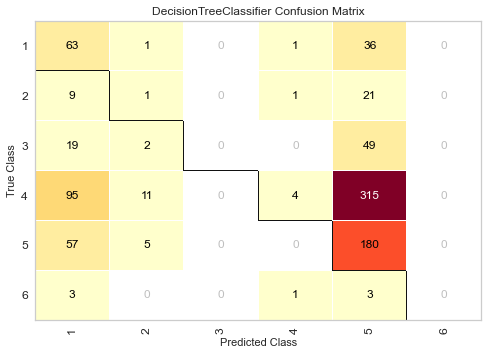

In [11]:
cm = ConfusionMatrix(model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [12]:
# still oversampled
#define model
model = DecisionTreeClassifier(max_depth=5, random_state=0)

# evaluate pipeline
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, cat_X_train, cat_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.358 (0.019)


In [13]:
model.fit(cat_X_train, cat_y_train)
cat_y_pred = model.predict(cat_X_test)
print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.3124287343215507
              precision    recall  f1-score   support

           1       0.49      0.35      0.41       140
           2       0.06      0.12      0.08        17
           3       0.00      0.00      0.00         3
           4       0.37      0.55      0.45       289
           5       0.26      0.34      0.30       190
           6       0.00      0.00      0.00       238

    accuracy                           0.31       877
   macro avg       0.20      0.23      0.20       877
weighted avg       0.26      0.31      0.28       877

0.5239910787059522


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


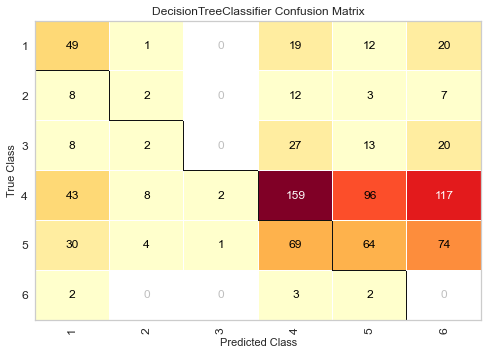

In [14]:
cm = ConfusionMatrix(model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


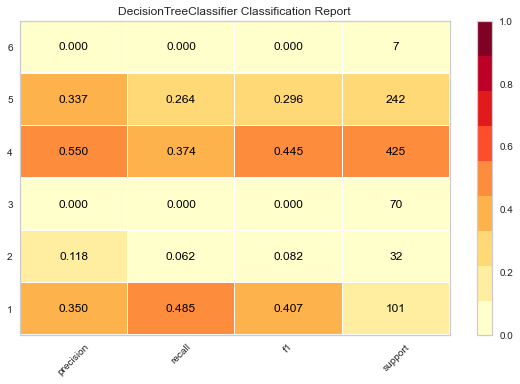

In [15]:
visualizer = ClassificationReport(model,  support=True)

visualizer.fit(cat_X_train, cat_y_train)       # Fit the visualizer and the model
visualizer.score(cat_X_test, cat_y_test)        # Evaluate the model on the test data
visualizer.show() 

In [16]:
# still oversampled
#define model
model = DecisionTreeClassifier(max_depth=8, random_state=0)

# evaluate pipeline
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, cat_X_train, cat_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.469 (0.016)


In [17]:
model.fit(cat_X_train, cat_y_train)
cat_y_pred = model.predict(cat_X_test)
print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.3261117445838084
              precision    recall  f1-score   support

           1       0.40      0.37      0.38       109
           2       0.12      0.06      0.08        70
           3       0.11      0.07      0.09       116
           4       0.41      0.55      0.47       316
           5       0.24      0.36      0.29       163
           6       0.00      0.00      0.00       103

    accuracy                           0.33       877
   macro avg       0.22      0.23      0.22       877
weighted avg       0.27      0.33      0.29       877

0.5329934509398282


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


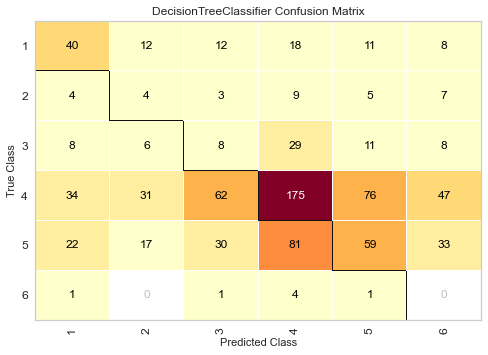

In [18]:
cm = ConfusionMatrix(model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [19]:
catdata.AdoptionChannelNum.value_counts()

4    1243
5     770
1     294
3     211
2     113
6      25
Name: AdoptionChannelNum, dtype: int64

C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


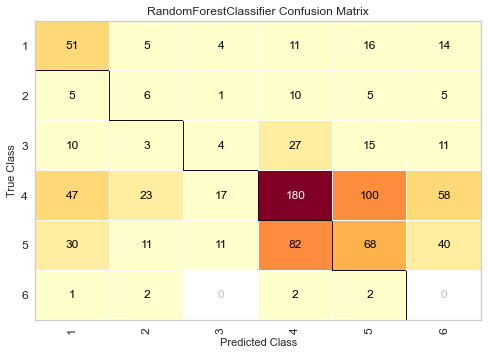

In [20]:
#try abalanced 
rf_model=RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=0)

#evaluate on the test set
cm = ConfusionMatrix(rf_model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [21]:
rf_model.fit(cat_X_train, cat_y_train)
cat_y_pred = rf_model.predict(cat_X_test)

print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.3523375142531357
              precision    recall  f1-score   support

           1       0.50      0.35      0.42       144
           2       0.19      0.12      0.15        50
           3       0.06      0.11      0.07        37
           4       0.42      0.58      0.49       312
           5       0.28      0.33      0.30       206
           6       0.00      0.00      0.00       128

    accuracy                           0.35       877
   macro avg       0.24      0.25      0.24       877
weighted avg       0.31      0.35      0.32       877

0.5487351058155366


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


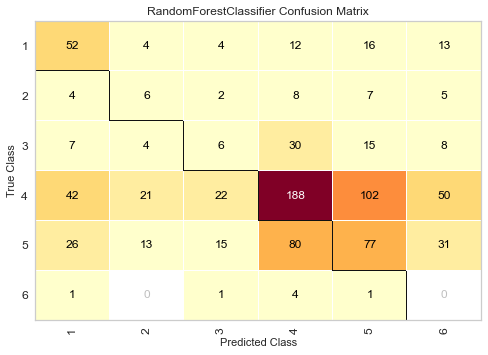

In [22]:
#try abalanced 
rf_model=RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=0)

#evaluate on the test set
cm = ConfusionMatrix(rf_model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [23]:
rf_model.fit(cat_X_train, cat_y_train)
cat_y_pred = rf_model.predict(cat_X_test)

print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.3751425313568985
              precision    recall  f1-score   support

           1       0.51      0.39      0.45       132
           2       0.19      0.12      0.15        48
           3       0.09      0.12      0.10        50
           4       0.44      0.58      0.50       322
           5       0.32      0.35      0.33       218
           6       0.00      0.00      0.00       107

    accuracy                           0.38       877
   macro avg       0.26      0.26      0.26       877
weighted avg       0.33      0.38      0.35       877

0.5583153961216613


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


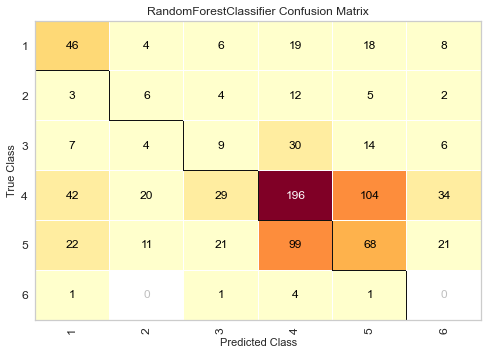

In [24]:
#try abalanced 
rf_model=RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=0)

#evaluate on the test set
cm = ConfusionMatrix(rf_model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [25]:
rf_model.fit(cat_X_train, cat_y_train)
cat_y_pred = rf_model.predict(cat_X_test)

print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.37058152793614596
              precision    recall  f1-score   support

           1       0.46      0.38      0.41       121
           2       0.19      0.13      0.16        45
           3       0.13      0.13      0.13        70
           4       0.46      0.54      0.50       360
           5       0.28      0.32      0.30       210
           6       0.00      0.00      0.00        71

    accuracy                           0.37       877
   macro avg       0.25      0.25      0.25       877
weighted avg       0.34      0.37      0.35       877

0.5522691789796449


In [26]:
#try smote and random forest
#split into train and testing sets
cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(cat_features, cat_target, 
                                                                    test_size =0.33, random_state=0)


#resample according to the highest frequency
oversample = SMOTE(random_state=0)
cat_X_train, cat_y_train = oversample.fit_resample(cat_X_train, cat_y_train)

In [27]:
#try abalanced 
rf_model=RandomForestClassifier(max_depth=3, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, cat_X_train, cat_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))



Mean Accuracy: 0.469 (0.016)


In [28]:
rf_model.fit(cat_X_train, cat_y_train)
cat_y_pred = rf_model.predict(cat_X_test)

print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.3523375142531357
              precision    recall  f1-score   support

           1       0.50      0.35      0.42       144
           2       0.19      0.12      0.15        50
           3       0.06      0.11      0.07        37
           4       0.42      0.58      0.49       312
           5       0.28      0.33      0.30       206
           6       0.00      0.00      0.00       128

    accuracy                           0.35       877
   macro avg       0.24      0.25      0.24       877
weighted avg       0.31      0.35      0.32       877

0.5487351058155366


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


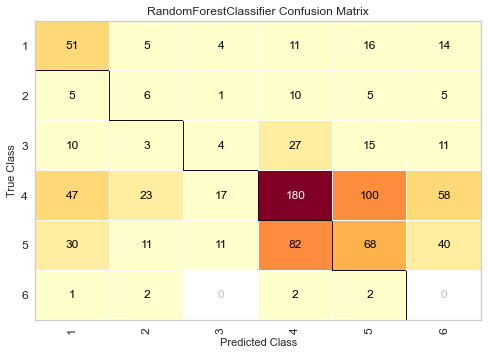

In [29]:
#evaluate on the test set
cm = ConfusionMatrix(rf_model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [30]:
#try abalanced 
rf_model=RandomForestClassifier(max_depth=5, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, cat_X_train, cat_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))



Mean Accuracy: 0.469 (0.016)


In [31]:
rf_model.fit(cat_X_train, cat_y_train)
cat_y_pred = rf_model.predict(cat_X_test)

print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.3751425313568985
              precision    recall  f1-score   support

           1       0.51      0.39      0.45       132
           2       0.19      0.12      0.15        48
           3       0.09      0.12      0.10        50
           4       0.44      0.58      0.50       322
           5       0.32      0.35      0.33       218
           6       0.00      0.00      0.00       107

    accuracy                           0.38       877
   macro avg       0.26      0.26      0.26       877
weighted avg       0.33      0.38      0.35       877

0.5583153961216613


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


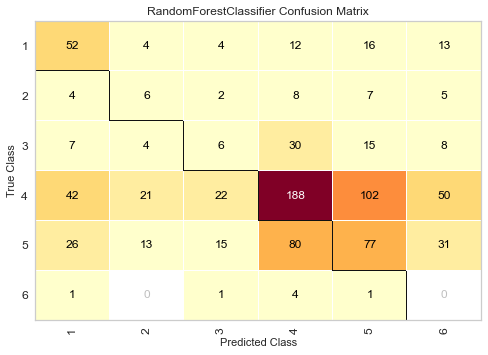

In [32]:
#evaluate on the test set
cm = ConfusionMatrix(rf_model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [33]:
#try abalanced 
rf_model=RandomForestClassifier(max_depth=8, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, cat_X_train, cat_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))



Mean Accuracy: 0.469 (0.016)


In [34]:
rf_model.fit(cat_X_train, cat_y_train)
cat_y_pred = rf_model.predict(cat_X_test)

print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.37058152793614596
              precision    recall  f1-score   support

           1       0.46      0.38      0.41       121
           2       0.19      0.13      0.16        45
           3       0.13      0.13      0.13        70
           4       0.46      0.54      0.50       360
           5       0.28      0.32      0.30       210
           6       0.00      0.00      0.00        71

    accuracy                           0.37       877
   macro avg       0.25      0.25      0.25       877
weighted avg       0.34      0.37      0.35       877

0.5522691789796449


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


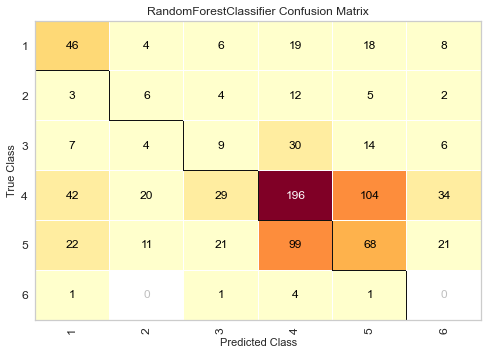

In [35]:
#evaluate on the test set
cm = ConfusionMatrix(rf_model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [36]:
scores

array([0.46334012, 0.48268839, 0.47556008, 0.45973496, 0.4841998 ,
       0.46741344, 0.4796334 , 0.42769857, 0.48114169, 0.47502548,
       0.48879837, 0.46639511, 0.4796334 , 0.44954128, 0.44954128])

In [37]:
#baseline KNN

#split into train and testing sets
cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(cat_features, cat_target, 
                                                                    test_size =0.33, random_state=0)

model= KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, cat_X_train, cat_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.417 (0.026)


In [38]:
model.n_neighbors

5

C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


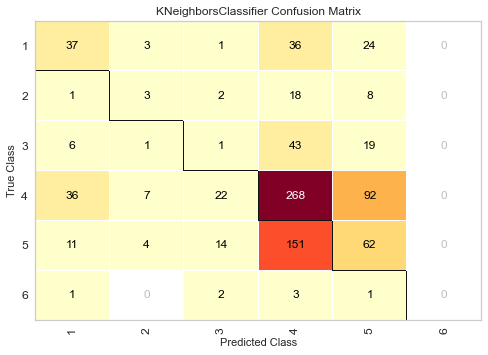

In [39]:
#evaluate on the test set
cm = ConfusionMatrix(model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [40]:
cat_model = model.fit(cat_X_train, cat_y_train)
cat_y_pred = cat_model.predict(cat_X_test)
print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.42303306727480045
              precision    recall  f1-score   support

           1       0.37      0.40      0.38        92
           2       0.09      0.17      0.12        18
           3       0.01      0.02      0.02        42
           4       0.63      0.52      0.57       519
           5       0.26      0.30      0.28       206
           6       0.00      0.00      0.00         0

    accuracy                           0.42       877
   macro avg       0.23      0.23      0.23       877
weighted avg       0.47      0.42      0.44       877

0.5366370268376567


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#try smote oversampling.\

#resample according to the highest frequency
oversample = SMOTE(random_state=0)
cat_X_train, cat_y_train = oversample.fit_resample(cat_X_train, cat_y_train)

In [42]:
#oversampled
knn_model= KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, cat_X_train, cat_y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean Accuracy: 0.675 (0.010)


C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


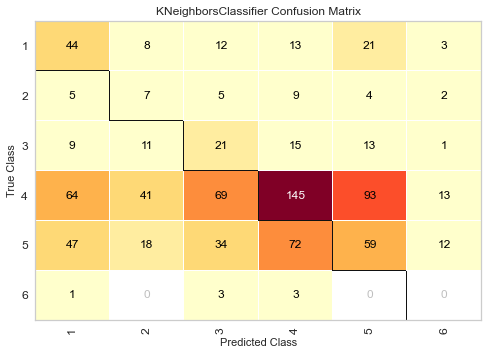

In [43]:

#evaluate on the test set
cm = ConfusionMatrix(knn_model)
cm.fit(cat_X_train, cat_y_train)
cm.score(cat_X_test, cat_y_test)
cm.show()

In [44]:
cat_knn_model = knn_model.fit(cat_X_train, cat_y_train)
cat_y_pred = cat_knn_model.predict(cat_X_test)
print(metrics.accuracy_score(cat_y_pred, cat_y_test))
print(metrics.classification_report(cat_y_pred, cat_y_test))

print(multiclass_roc_auc_score(cat_y_test, cat_y_pred) )

0.314709236031927
              precision    recall  f1-score   support

           1       0.44      0.26      0.32       170
           2       0.22      0.08      0.12        85
           3       0.30      0.15      0.20       144
           4       0.34      0.56      0.43       257
           5       0.24      0.31      0.27       190
           6       0.00      0.00      0.00        31

    accuracy                           0.31       877
   macro avg       0.26      0.23      0.22       877
weighted avg       0.31      0.31      0.29       877

0.5535464581254715


In [45]:
cat_knn_model.n_neighbors

5

C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


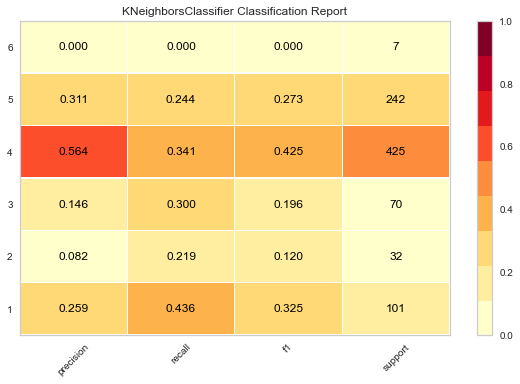

In [46]:
visualizer = ClassificationReport(knn_model,  support=True)

visualizer.fit(cat_X_train, cat_y_train)       # Fit the visualizer and the model
visualizer.score(cat_X_test, cat_y_test)        # Evaluate the model on the test data
visualizer.show() 

C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


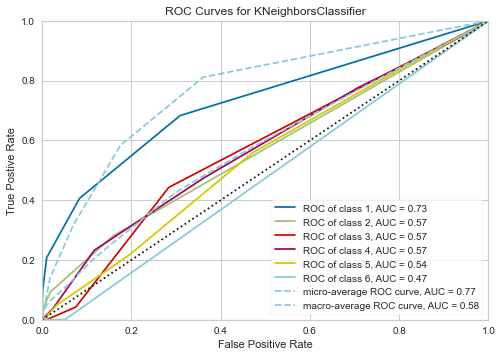

In [47]:
#recall is excellent for all classes 
visualizer = ROCAUC(cat_model)

visualizer.fit(cat_X_train, cat_y_train)        # Fit the visualizer and the model
visualizer.score(cat_X_test, cat_y_test)        # Evaluate the model on the test data
visualizer.show() 

C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


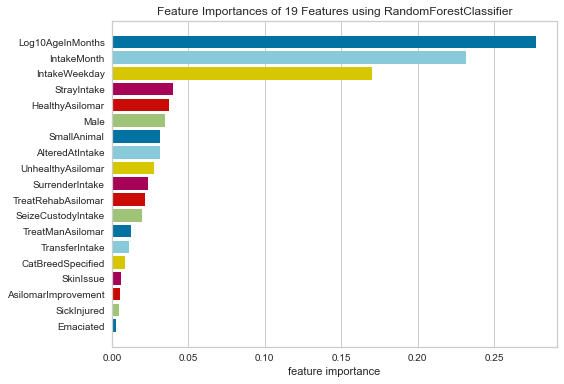

In [48]:
#knn does not have a coefficient or best feature model.  Getting them from the random forest
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(RandomForestClassifier(), relative=False)

# Fit and show the feature importances
viz.fit(cat_X_train, cat_y_train)
viz.show()

C:\Users\rvick\Anaconda3\envs\R_Python\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


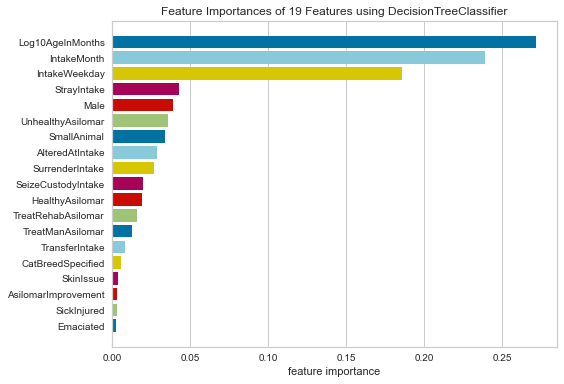

In [49]:
#knn does not have a coefficient or best feature model.  Getting them from the random forest
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(DecisionTreeClassifier(), relative=False)

# Fit and show the feature importances
viz.fit(cat_X_train, cat_y_train)
viz.show()